In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fatal-police-shootings-data.csv")

print(df.head())
print(df.info())

   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  02-01-2015              shot         gun  53.0   
1   4    Lewis Lee Lembke  02-01-2015              shot         gun  47.0   
2   5  John Paul Quintero  03-01-2015  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04-01-2015              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04-01-2015              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fl

In [26]:
state_counts = df['state'].value_counts()
print("")
print(state_counts.head(10))


state
CA    899
TX    538
FL    403
AZ    286
CO    216
GA    206
OK    180
WA    175
NC    175
OH    173
Name: count, dtype: int64


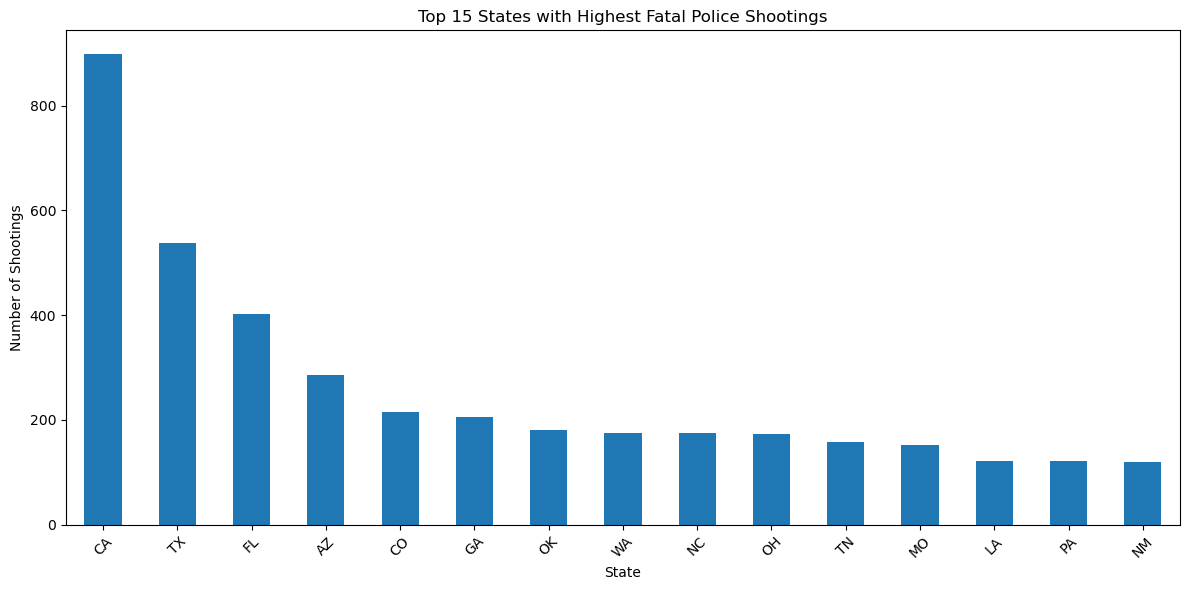

In [32]:
top_states = state_counts.head(15)
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar')
plt.title('Top 15 States with Highest Fatal Police Shootings')
plt.xlabel('State')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('state_wise_shootings.png')

In [34]:
unarmed_count = df[df['armed'] == 'unarmed'].shape[0]
print(f"Number of people shot while unarmed: {unarmed_count}")

Number of people shot while unarmed: 394


In [44]:
unarmed_df = df[df['armed'] == 'unarmed']
race_counts_unarmed = unarmed_df['race'].value_counts()
gender_counts_unarmed = unarmed_df['gender'].value_counts()
print("Breakdown by race for unarmed shootings:")
print(race_counts_unarmed)
print("\nBreakdown by gender for unarmed shootings:")
print(gender_counts_unarmed)

Breakdown by race for unarmed shootings:
race
W    164
B    134
H     71
A      8
N      5
O      5
Name: count, dtype: int64

Breakdown by gender for unarmed shootings:
gender
M    366
F     28
Name: count, dtype: int64


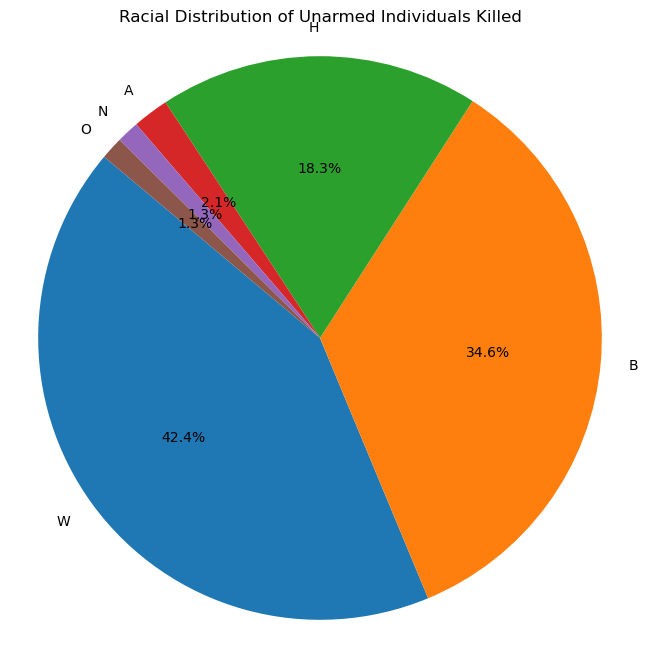

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(race_counts_unarmed, labels=race_counts_unarmed.index, autopct='%1.1f%%', startangle=140)
plt.title('Racial Distribution of Unarmed Individuals Killed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('unarmed_race_pie_chart.png')

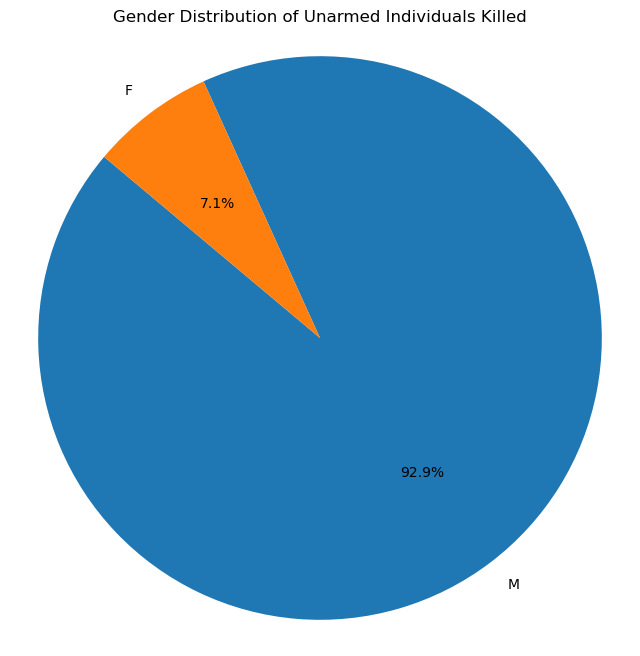

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_unarmed, labels=gender_counts_unarmed.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Unarmed Individuals Killed')
plt.axis('equal')
plt.savefig('unarmed_gender_pie_chart.png')

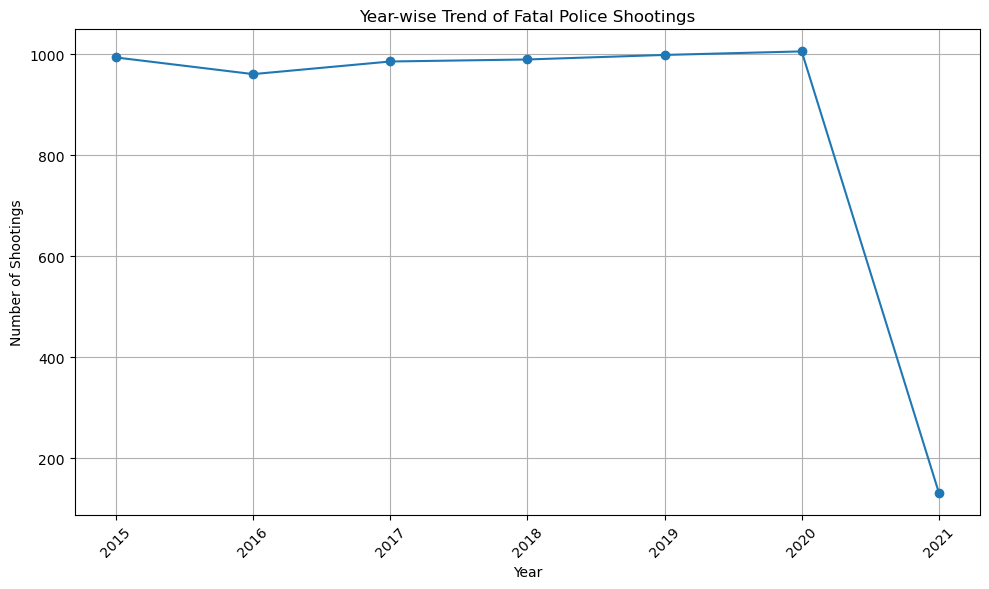

In [55]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['year'] = df['date'].dt.year
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Year-wise Trend of Fatal Police Shootings')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.xticks(year_counts.index, rotation=45)
plt.tight_layout()
plt.savefig('year_wise_trend.png')

state
CA    69
TX    41
FL    30
AZ    21
GA    17
OK    15
OH    15
WA    12
LA    12
CO    11
PA    10
MO     9
VA     9
MI     8
MD     8
Name: count, dtype: int64


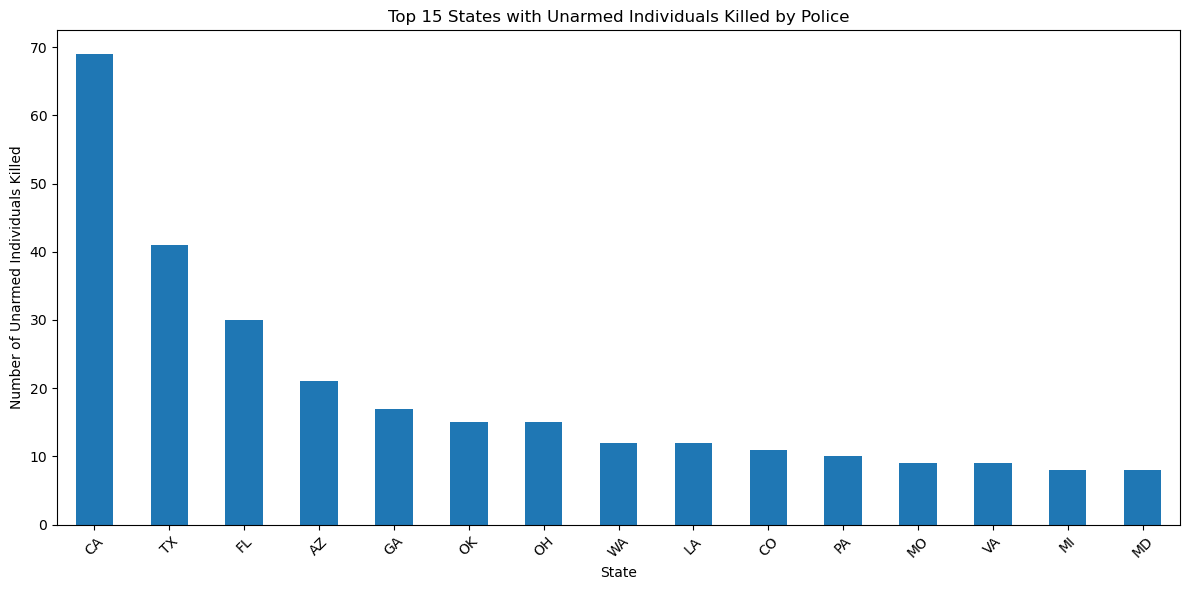

In [57]:
unarmed_df = df[df['armed'] == 'unarmed']
state_counts_unarmed = unarmed_df['state'].value_counts().head(15)

plt.figure(figsize=(12, 6))
state_counts_unarmed.plot(kind='bar')
plt.title('Top 15 States with Unarmed Individuals Killed by Police')
plt.xlabel('State')
plt.ylabel('Number of Unarmed Individuals Killed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('unarmed_statewise_distribution.png')

print(state_counts_unarmed)

Number of people killed in the absence of a body camera: 5302
Year-wise counts for killings without body camera:
year
2015    919
2016    815
2017    878
2018    872
2019    863
2020    839
2021    116
Name: count, dtype: int64

Top 15 state-wise counts for killings without body camera:
state
CA    752
TX    486
FL    375
AZ    244
CO    192
GA    187
WA    157
OH    157
OK    152
NC    152
MO    150
TN    145
PA    117
LA    107
NM    103
Name: count, dtype: int64


/var/folders/ml/9lq4ld051f5fszn2k_cpc6yh0000gn/T/ipykernel_1440/3684384966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_body_camera_df['year'] = pd.to_datetime(no_body_camera_df['date'], format='mixed').dt.year


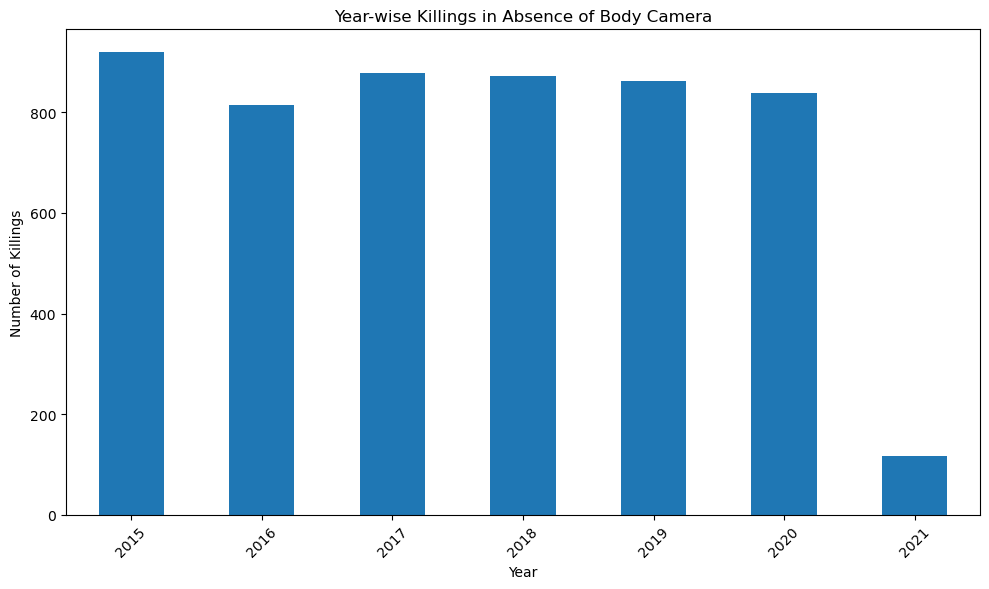

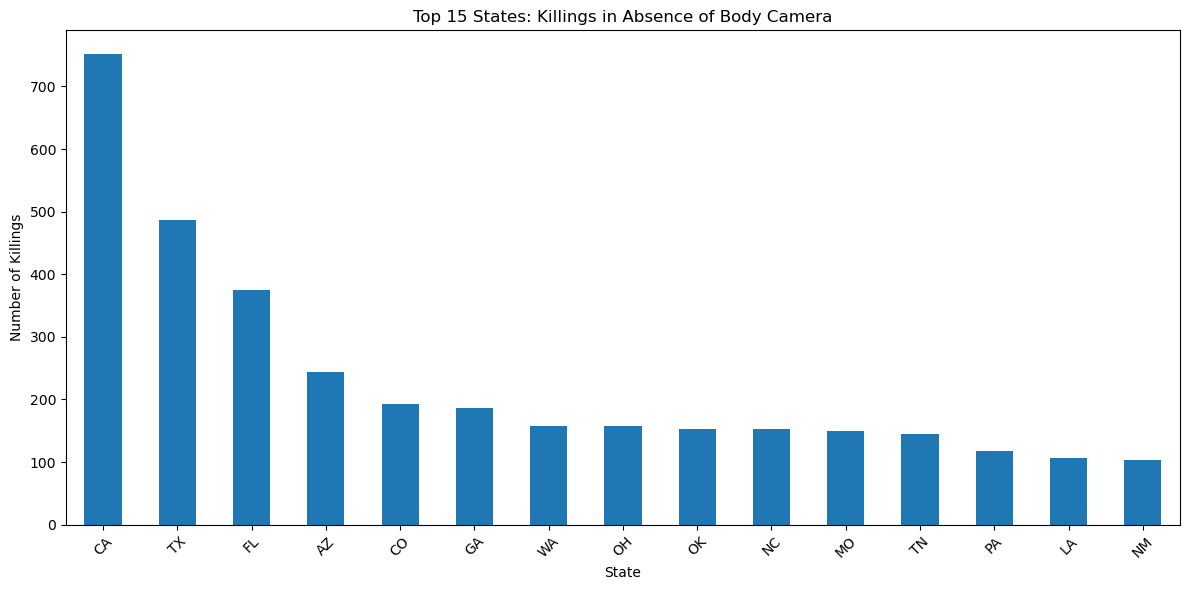

In [59]:
no_body_camera_count = df[df['body_camera'] == False].shape[0]
print(f"Number of people killed in the absence of a body camera: {no_body_camera_count}")

# Year-wise visualization for killings without body camera
no_body_camera_df = df[df['body_camera'] == False]
no_body_camera_df['year'] = pd.to_datetime(no_body_camera_df['date'], format='mixed').dt.year
year_counts_no_camera = no_body_camera_df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts_no_camera.plot(kind='bar')
plt.title('Year-wise Killings in Absence of Body Camera')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('year_wise_no_camera.png')

# State-wise visualization for killings without body camera
state_counts_no_camera = no_body_camera_df['state'].value_counts().head(15)

plt.figure(figsize=(12, 6))
state_counts_no_camera.plot(kind='bar')
plt.title('Top 15 States: Killings in Absence of Body Camera')
plt.xlabel('State')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('state_wise_no_camera.png')

print("Year-wise counts for killings without body camera:")
print(year_counts_no_camera)
print("\nTop 15 state-wise counts for killings without body camera:")
print(state_counts_no_camera)

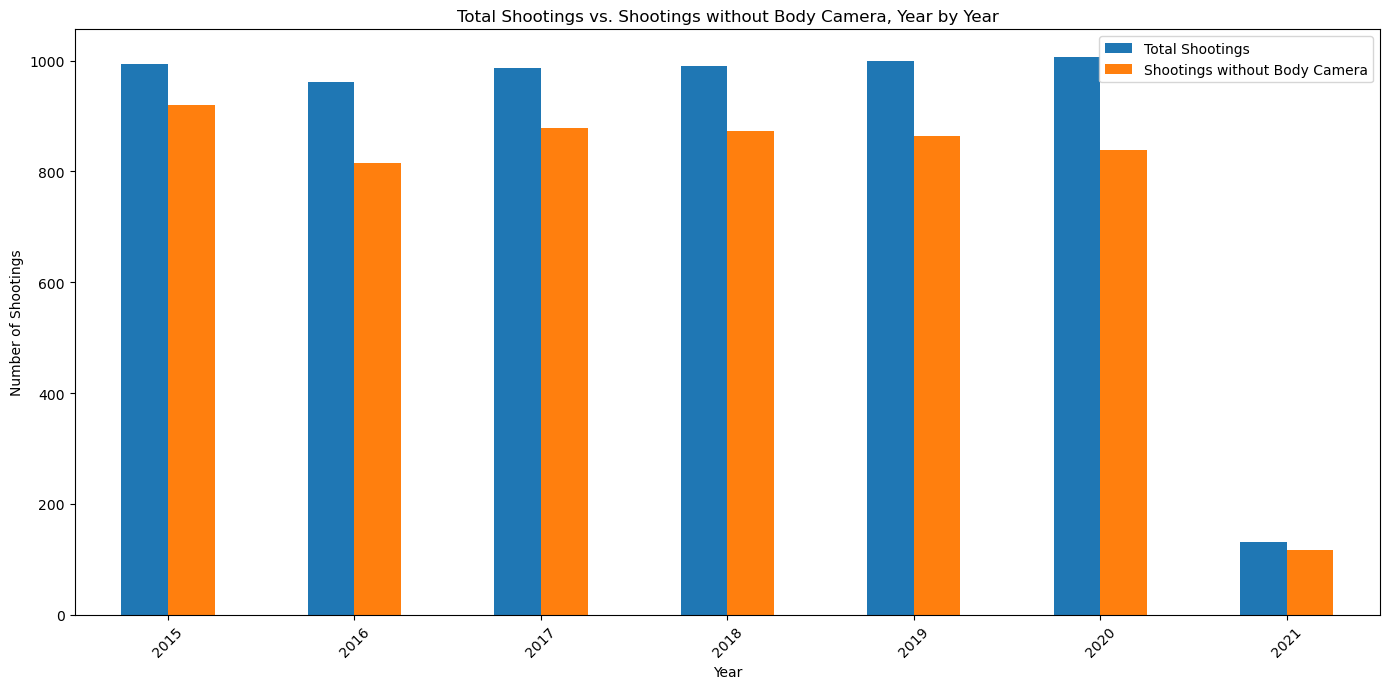

In [61]:
# This data is from previous calculations. Re-calculating for clarity and to ensure it's up to date.
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['year'] = df['date'].dt.year
year_counts = df['year'].value_counts().sort_index()

no_body_camera_df = df[df['body_camera'] == False]
year_counts_no_camera = no_body_camera_df['year'].value_counts().sort_index()

# Combine the data into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Total Shootings': year_counts,
    'Shootings without Body Camera': year_counts_no_camera
})

# Create the grouped bar chart
comparison_df.plot(kind='bar', figsize=(14, 7))
plt.title('Total Shootings vs. Shootings without Body Camera, Year by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_vs_no_camera_shootings_yearly.png')